In [32]:
import pandas as pd

# Load the csv data as a pandas dataframe
google_stock_df = pd.read_csv('datasets/GOOGL.csv')

open_price_data = google_stock_df['Open']
# normalized_open_data = (open_price_data-open_price_data.min())/(open_price_data.max()-open_price_data.min())
normalized_open_data = open_price_data
# Separate into train a test data
train_data = normalized_open_data[:-1000]
test_data = normalized_open_data[-1000:]
train_data[0]


In [63]:
from SMRNN import SMRNN
from torch import optim
import torch.nn as nn
# Create the network optimizer and loss function
net = SMRNN(inputs = 1, outputs = 1, inner_state_size = 5,net1_inner_topology = [10,10,20,10,5,2], net2_inner_topology = [7,15,30,70],net3_inner_topology = [7,7,5])
optimizer = optim.Adam(net.parameters(),lr=1e-2)
scheduler = optim.lr_scheduler.ExponentialLR(optimizer,0.8)
loss_func = nn.MSELoss()



In [16]:
import torch
#detect gpu and move the net there
torch.cuda.is_available()

False

tensor([544.9210], grad_fn=<AbsBackward0>)
Predicted: 1.6489641666412354, actual: 546.5700073242188
tensor([844.5598], grad_fn=<AbsBackward0>)
Predicted: 4.92017126083374, actual: 849.47998046875
tensor([233.9032], grad_fn=<AbsBackward0>)
Predicted: 2.71345591545105, actual: 236.6166229248047
tensor([244.2423], grad_fn=<AbsBackward0>)
Predicted: 4.091039657592773, actual: 248.3333282470703
tensor([1067.4061], grad_fn=<AbsBackward0>)
Predicted: 25.97391700744629, actual: 1093.3800048828125
tensor([517.0577], grad_fn=<AbsBackward0>)
Predicted: 17.45233726501465, actual: 534.510009765625
tensor([149.9996], grad_fn=<AbsBackward0>)
Predicted: 7.162510871887207, actual: 157.1621551513672
tensor([304.1877], grad_fn=<AbsBackward0>)
Predicted: 19.84627342224121, actual: 324.0340270996094
tensor([220.6387], grad_fn=<AbsBackward0>)
Predicted: 19.951900482177734, actual: 240.59059143066406
tensor([279.4128], grad_fn=<AbsBackward0>)
Predicted: 34.5611572265625, actual: 313.9739685058594
tensor([168

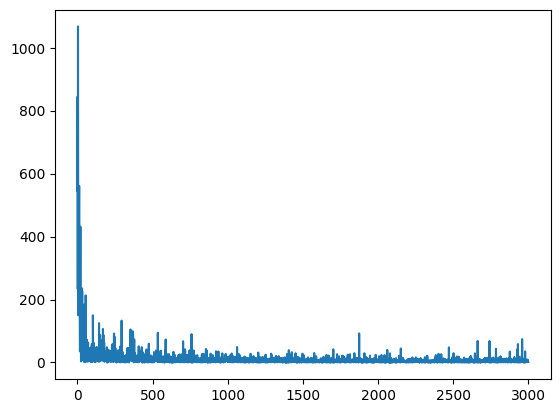

In [64]:
import random
from matplotlib import pyplot
# train the network (in this case only with the open price)
epochs = 3000
# the batch sizes will be random to let the model to learn in diferent lengths
max_batch_size = 30
min_batch_size = 10
losses = []
for epoch in range(epochs):
    batch_size = random.randint(5,20)
    train_index = random.randint(0,train_data.size - max_batch_size - 2)
    for batch_num in range(batch_size):
        inpt = torch.tensor([float(train_data[train_index+batch_num])])
        output = net(inpt)
    expected_out = torch.tensor([float(train_data[train_index+batch_size])])
    loss = torch.abs(output - expected_out)
    # loss = loss_func(output,expected_out)
    print(loss)
    print(f'Predicted: {float(output)}, actual: {float(expected_out)}')
    losses.append(float(loss))
    loss.backward()
    optimizer.step()
    optimizer.zero_grad()
    if epoch % 100 == 99:
        scheduler.step()
    net.clean()

pyplot.plot(list(range(epochs)),losses)
pyplot.show()
    